In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
from matplotlib.ticker import PercentFormatter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import folium, fiona, branca
import skmob
from numpy.linalg import inv, det
from sklearn.preprocessing import StandardScaler
from skmob.preprocessing import detection
from skmob.tessellation import tilers
from skmob.measures.collective import visits_per_location
from skmob.measures.individual import distance_straight_line, home_location, maximum_distance, number_of_locations
import networkx as nx

In [10]:
df = pd.read_csv("../../data/output/df_info_all_merge.csv",)

In [11]:
df.head()

datetime      hora           Name  comercio  proveedor  producto  \
0  2019-02-21  09:10:48        Rosales     90093        6.0       2.0   
1  2019-02-07  09:12:07        Rosales     90093        6.0       2.0   
2  2019-04-16  21:30:15  Juan Montalvo     92168        6.0       2.0   
3  2019-04-09  20:35:36  Juan Montalvo     92168        6.0       2.0   
4  2019-04-22  17:28:48        Samanes     92593        6.0       2.0   

   ejecutivo   latitud   longitud cliente_final  distance_straight_line  \
0      367.0 -2.115323 -79.910043    %.+%+-')%!                4.754176   
1      367.0 -2.115323 -79.910043    %.+%+-')%!                4.754176   
2      263.0 -2.124883 -79.927019    %.+%+-')%!                4.754176   
3      263.0 -2.124883 -79.927019    %.+%+-')%!                4.754176   
4      367.0 -2.119984 -79.904241    %.+%+-')%!                4.754176   

   number_of_locations  n_visits  home_lat   home_lng  location_frequency  
0                    3         2 -2.119984 -79.904241                   2  
1                    3         2 -2.119984 -79.904241                   2  
2                    3       407 -2.119984 -79.904241                   2  
3                    3       407 -2.119984 -79.904241                   2  
4                    3       313 -2.119984 -79.904241                  22

In [12]:
df.shape

(70410, 16)

In [13]:
df = df.rename(columns={"distance_straight_line": "distance_km"})

### Al menos una visualización geográfica con mapa coroplético.


In [14]:
gye_quito_gdf = gpd.read_file('../../data/geojson/gye_quito.geojson')

In [15]:
gye_quito_gdf.head()

stroke  stroke-width  stroke-opacity     fill  fill-opacity  \
0  #555555           2.0             1.0  #555555           0.5   
1  #555555           2.0             1.0  #555555           0.5   
2  #555555           2.0             1.0  #555555           0.5   
3  #555555           2.0             1.0  #555555           0.5   
4     None           NaN             NaN     None           NaN   

                     Name       Description  \
0   Urbanizacion La Saiba              None   
1  Ciudadela 9 de Octubre              None   
2                 Galavsa              None   
3   Parroquia Pedro Carbo   Parroquia Carbo   
4        Parroquia Olmedo  Parroquia Olmedo   

                                            geometry  
0  POLYGON ((-79.89851 -2.22271, -79.89738 -2.230...  
1  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  
2  POLYGON ((-79.94596 -2.08587, -79.93931 -2.082...  
3  POLYGON ((-79.88000 -2.18365, -79.88074 -2.183...  
4  POLYGON ((-79.88402 -2.20781, -79.88352 -2.205...

In [16]:
gye_quito_gdf.geometry.centroid

/tmp/ipykernel_23308/1894844003.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gye_quito_gdf.geometry.centroid


0      POINT (-79.89426 -2.22719)
1      POINT (-79.89390 -2.23324)
2      POINT (-79.94485 -2.08135)
3      POINT (-79.87990 -2.18737)
4      POINT (-79.88522 -2.20339)
                  ...            
235    POINT (-78.53627 -0.33620)
236    POINT (-79.92698 -2.15359)
237    POINT (-79.91173 -2.18396)
238    POINT (-78.48176 -0.17965)
239    POINT (-78.47941 -0.14671)
Length: 240, dtype: geometry

In [17]:
gye_gdf = gye_quito_gdf.merge(df, on='Name')

In [18]:
gye_gdf.head()

stroke  stroke-width  stroke-opacity     fill  fill-opacity  \
0  #555555           2.0             1.0  #555555           0.5   
1  #555555           2.0             1.0  #555555           0.5   
2  #555555           2.0             1.0  #555555           0.5   
3  #555555           2.0             1.0  #555555           0.5   
4  #555555           2.0             1.0  #555555           0.5   

                     Name Description  \
0  Ciudadela 9 de Octubre        None   
1  Ciudadela 9 de Octubre        None   
2  Ciudadela 9 de Octubre        None   
3  Ciudadela 9 de Octubre        None   
4  Ciudadela 9 de Octubre        None   

                                            geometry    datetime      hora  \
0  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-12-11  21:19:47   
1  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-11-27  17:17:02   
2  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-10-19  15:29:15   
3  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-09-15  00:49:32   
4  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-12-16  07:20:51   

   ...  ejecutivo   latitud   longitud  cliente_final  distance_km  \
0  ...      208.0 -2.231291 -79.890684     %.+.*!-*-!    21.391094   
1  ...      208.0 -2.231291 -79.890684     %.+!!&)(--    56.911374   
2  ...      208.0 -2.231291 -79.890684     %.+'%.+%(&     8.921539   
3  ...      208.0 -2.231291 -79.890684     %.*..(.'-.    63.440225   
4  ...      208.0 -2.231291 -79.890684     %.+&-'(&'&    17.139112   

   number_of_locations n_visits  home_lat   home_lng  location_frequency  
0                    4     1593 -2.210968 -79.925298                   1  
1                    6     1593 -2.125813 -79.922279                   1  
2                    2     1593 -2.210968 -79.925298                   1  
3                    7     1593 -2.249834 -79.890071                   1  
4                    7     1593 -2.202541 -79.926314                   1  

[5 rows x 23 columns]

In [19]:
gye_gdf['location_frequency'].value_counts()

6     4596
7     4207
8     3592
1     3418
5     3175
      ... 
66      66
65      65
61      61
51      51
48      48
Name: location_frequency, Length: 98, dtype: int64

In [20]:
gye_gdf_output = gye_gdf[['Name', 'n_visits', 'comercio', 'geometry']]

In [21]:
gye_gdf_output.head()

Name  n_visits  comercio  \
0  Ciudadela 9 de Octubre      1593     90706   
1  Ciudadela 9 de Octubre      1593     90706   
2  Ciudadela 9 de Octubre      1593     90706   
3  Ciudadela 9 de Octubre      1593     90706   
4  Ciudadela 9 de Octubre      1593     90706   

                                            geometry  
0  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  
1  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  
2  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  
3  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  
4  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...

In [22]:
gye_gdf_output.shape

(70410, 4)

In [23]:
gye_gdf_output = gye_gdf_output.drop_duplicates(keep='first')

In [24]:
gye_gdf_output.shape

(272, 4)

In [25]:
gye_gdf.shape

(70410, 23)

In [26]:
gye_gdf_output.to_file('../../data/geojson/gye_gdf_output.geojson', driver='GeoJSON')

In [27]:
#crea el mapa con un tile service
centroid=gye_gdf_output.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=12,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')

/tmp/ipykernel_23308/872182421.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid=gye_gdf_output.geometry.centroid


In [28]:
field = "n_visits"
label = "Neighborhood visits"
colormap = branca.colormap.linear.YlOrBr_04.to_step(4).scale(gye_gdf_output[field].min(),gye_gdf_output[field].max())
colormap.caption = label
layer = folium.GeoJson('../../data/geojson/gye_gdf_output.geojson',
        name=label,
        style_function=lambda x: {"weight":2, 'color':'black','fillColor':colormap(x['properties'][field]), 'fillOpacity':1},
        highlight_function=lambda x: {'weight':5, 'color':'black'},
        smooth_factor=2.0,
        tooltip=folium.features.GeoJsonTooltip(fields=['Name',field],
                                      aliases=['Name',label],
                                      labels=True,
                                      sticky=True,
                                      localize=True
                                     ),
        show = True,
        overlay = True
        )
m.add_child(layer)
m.add_child(colormap)

### Network Analysis

In [29]:
tdf = skmob.TrajDataFrame(gye_gdf, latitude='latitud', longitude='longitud', datetime='fecha', user_id='cliente_final')
tdf.head()

stroke  stroke-width  stroke-opacity     fill  fill-opacity  \
0  #555555           2.0             1.0  #555555           0.5   
1  #555555           2.0             1.0  #555555           0.5   
2  #555555           2.0             1.0  #555555           0.5   
3  #555555           2.0             1.0  #555555           0.5   
4  #555555           2.0             1.0  #555555           0.5   

                     Name Description  \
0  Ciudadela 9 de Octubre        None   
1  Ciudadela 9 de Octubre        None   
2  Ciudadela 9 de Octubre        None   
3  Ciudadela 9 de Octubre        None   
4  Ciudadela 9 de Octubre        None   

                                            geometry   datetime      hora  \
0  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235... 2019-12-11  21:19:47   
1  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235... 2019-11-27  17:17:02   
2  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235... 2019-10-19  15:29:15   
3  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235... 2019-09-15  00:49:32   
4  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235... 2019-12-16  07:20:51   

   ...  ejecutivo       lat        lng         uid  distance_km  \
0  ...      208.0 -2.231291 -79.890684  %.+.*!-*-!    21.391094   
1  ...      208.0 -2.231291 -79.890684  %.+!!&)(--    56.911374   
2  ...      208.0 -2.231291 -79.890684  %.+'%.+%(&     8.921539   
3  ...      208.0 -2.231291 -79.890684  %.*..(.'-.    63.440225   
4  ...      208.0 -2.231291 -79.890684  %.+&-'(&'&    17.139112   

   number_of_locations n_visits  home_lat   home_lng  location_frequency  
0                    4     1593 -2.210968 -79.925298                   1  
1                    6     1593 -2.125813 -79.922279                   1  
2                    2     1593 -2.210968 -79.925298                   1  
3                    7     1593 -2.249834 -79.890071                   1  
4                    7     1593 -2.202541 -79.926314                   1  

[5 rows x 23 columns]

In [30]:
tdf.shape

(70410, 23)

In [31]:
gye_quito_gdf = gpd.read_file('../../data/geojson/gye_quito.geojson')

In [32]:
tessellation = gye_quito_gdf.loc[:, ['Name','geometry', 'Description']]

In [33]:
tessellation.rename(columns={'Name':'tile_ID'}, inplace=True)
tessellation.head()

tile_ID                                           geometry  \
0   Urbanizacion La Saiba  POLYGON ((-79.89851 -2.22271, -79.89738 -2.230...   
1  Ciudadela 9 de Octubre  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...   
2                 Galavsa  POLYGON ((-79.94596 -2.08587, -79.93931 -2.082...   
3   Parroquia Pedro Carbo  POLYGON ((-79.88000 -2.18365, -79.88074 -2.183...   
4        Parroquia Olmedo  POLYGON ((-79.88402 -2.20781, -79.88352 -2.205...   

        Description  
0              None  
1              None  
2              None  
3   Parroquia Carbo  
4  Parroquia Olmedo

In [34]:
fdf = tdf.to_flowdataframe(tessellation=tessellation, self_loops=True, )
fdf.head()

/home/kevinjlope/anaconda3/envs/IDS/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_23308/2586845459.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  fdf = tdf.to_flowdataframe(tessellation=tessellation, self_loops=True, )
/home/kevinjlope/anaconda3/envs/IDS/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:322: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

origin      destination   flow
0  Abel Gilbert     Abel Gilbert  10325
1  Abel Gilbert        Atarazana      4
2  Abel Gilbert  Balerio Estacio      2
3  Abel Gilbert     Barrio Lindo     31
4  Abel Gilbert  Barrio Orellana      1

In [35]:
m = fdf.plot_flows(flow_color='red')
m

### Clustering

In [36]:
gye_gdf.head()

stroke  stroke-width  stroke-opacity     fill  fill-opacity  \
0  #555555           2.0             1.0  #555555           0.5   
1  #555555           2.0             1.0  #555555           0.5   
2  #555555           2.0             1.0  #555555           0.5   
3  #555555           2.0             1.0  #555555           0.5   
4  #555555           2.0             1.0  #555555           0.5   

                     Name Description  \
0  Ciudadela 9 de Octubre        None   
1  Ciudadela 9 de Octubre        None   
2  Ciudadela 9 de Octubre        None   
3  Ciudadela 9 de Octubre        None   
4  Ciudadela 9 de Octubre        None   

                                            geometry    datetime      hora  \
0  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-12-11  21:19:47   
1  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-11-27  17:17:02   
2  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-10-19  15:29:15   
3  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-09-15  00:49:32   
4  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-12-16  07:20:51   

   ...  ejecutivo   latitud   longitud  cliente_final  distance_km  \
0  ...      208.0 -2.231291 -79.890684     %.+.*!-*-!    21.391094   
1  ...      208.0 -2.231291 -79.890684     %.+!!&)(--    56.911374   
2  ...      208.0 -2.231291 -79.890684     %.+'%.+%(&     8.921539   
3  ...      208.0 -2.231291 -79.890684     %.*..(.'-.    63.440225   
4  ...      208.0 -2.231291 -79.890684     %.+&-'(&'&    17.139112   

   number_of_locations n_visits  home_lat   home_lng  location_frequency  
0                    4     1593 -2.210968 -79.925298                   1  
1                    6     1593 -2.125813 -79.922279                   1  
2                    2     1593 -2.210968 -79.925298                   1  
3                    7     1593 -2.249834 -79.890071                   1  
4                    7     1593 -2.202541 -79.926314                   1  

[5 rows x 23 columns]

In [37]:
gye_gdf_clustering = gye_gdf[['cliente_final', 'number_of_locations', 'distance_km', 'location_frequency']]

In [38]:
gye_gdf_clustering

cliente_final  number_of_locations  distance_km  location_frequency
0        %.+.*!-*-!                    4    21.391094                   1
1        %.+!!&)(--                    6    56.911374                   1
2        %.+'%.+%(&                    2     8.921539                   1
3        %.*..(.'-.                    7    63.440225                   1
4        %.+&-'(&'&                    7    17.139112                   1
...             ...                  ...          ...                 ...
70405    %..*'(&.-!                    2     6.461944                   9
70406    %..*'(&.-!                    2     6.461944                   9
70407    %..*'(&.-!                    2     6.461944                   9
70408    %..*'(&.-!                    2     6.461944                   9
70409    %..*'(&.-!                    2     6.461944                   9

[70410 rows x 4 columns]

In [39]:
gye_gdf_clustering = gye_gdf_clustering.drop_duplicates(keep='first')

In [40]:
gye_gdf_clustering

cliente_final  number_of_locations  distance_km  location_frequency
0        %.+.*!-*-!                    4    21.391094                   1
1        %.+!!&)(--                    6    56.911374                   1
2        %.+'%.+%(&                    2     8.921539                   1
3        %.*..(.'-.                    7    63.440225                   1
4        %.+&-'(&'&                    7    17.139112                   1
...             ...                  ...          ...                 ...
70388  %%&&)%+-+)-)                    2    22.812903                   1
70389    %.+!'%*('*                    2    11.284103                   1
70390    %.--&'!&+)                    2     4.633113                  10
70400    %..%-&+%)'                    2    11.556462                   1
70401    %..*'(&.-!                    2     6.461944                   9

[9755 rows x 4 columns]

In [41]:
gye_gdf_clustering = gye_gdf_clustering.rename(columns={'uid': 'user_id'})

In [42]:
gye_gdf_clustering.head()

cliente_final  number_of_locations  distance_km  location_frequency
0    %.+.*!-*-!                    4    21.391094                   1
1    %.+!!&)(--                    6    56.911374                   1
2    %.+'%.+%(&                    2     8.921539                   1
3    %.*..(.'-.                    7    63.440225                   1
4    %.+&-'(&'&                    7    17.139112                   1

In [43]:
X = gye_gdf_clustering[['number_of_locations', 'distance_km', 'location_frequency']]

In [44]:
sc = StandardScaler() # standardize the data (StandardScaler() is the z-score)

In [45]:
sc.fit(X) # fit the scaler to the data (to learn the mean and std)

StandardScaler()

In [46]:
X_norm = sc.transform(X) # transform the data to get the standardized data

In [47]:
X_norm

array([[ 1.41667665,  0.31415269, -0.58406677],
       [ 3.35492078,  1.34670119, -0.58406677],
       [-0.52156749, -0.04832813, -0.58406677],
       ...,
       [-0.52156749, -0.17298953,  0.28492173],
       [-0.52156749,  0.02826715, -0.58406677],
       [-0.52156749, -0.11982677,  0.18836745]])

In [48]:
X_norm.shape

(9755, 3)

In [49]:
clusters = np.arange(2,10) # range of clusters to try (k=2....k=9)

In [50]:
# method of KMeans to find the best number of clusters
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0) # create the model
    kmeans.fit(X_norm) # fit the model to the data
    inercias.append(kmeans.inertia_) # append the inertia to the list

In [51]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias}) # create a dataframe with the clusters and inertia

In [52]:
eva

K       inercia
0  2  18927.689040
1  3  13636.784070
2  4   8965.833787
3  5   7108.046758
4  6   5570.034007
5  7   4919.226179
6  8   4241.336127
7  9   3672.492937

<AxesSubplot:xlabel='K', ylabel='inercia'>

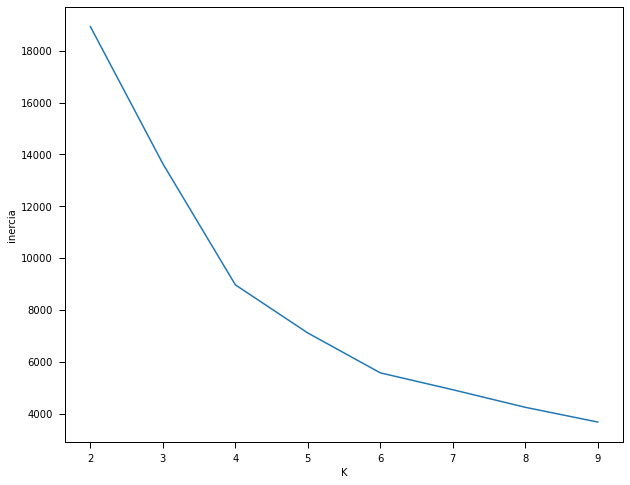

In [53]:
fig, ax = plt.subplots(figsize=(10,8)) # create a figure and axes
sns.lineplot(data = eva, x = "K", y = "inercia") # plot the data

In [54]:
kmeans = KMeans(n_clusters=4, random_state=0) # create the model

In [55]:
kmeans.fit(X_norm) # fit the model to the data (k=4)

KMeans(n_clusters=4, random_state=0)

In [56]:
kmeans.cluster_centers_ # get the cluster centers (centroids)

array([[-0.51900283, -0.14637356, -0.09238416],
       [16.92262973, 27.30969214,  0.69044969],
       [ 0.91409293,  0.18956334, -0.25869608],
       [-0.13836871, -0.0382866 ,  3.58968894]])

In [57]:
gye_gdf_clustering["cluster"] = kmeans.labels_ # add a new column with the cluster labels to the dataframe

In [58]:
gye_gdf_clustering.head()

cliente_final  number_of_locations  distance_km  location_frequency  cluster
0    %.+.*!-*-!                    4    21.391094                   1        2
1    %.+!!&)(--                    6    56.911374                   1        2
2    %.+'%.+%(&                    2     8.921539                   1        0
3    %.*..(.'-.                    7    63.440225                   1        2
4    %.+&-'(&'&                    7    17.139112                   1        2

In [59]:
gye_gdf_clustering.isna().sum()

cliente_final          0
number_of_locations    0
distance_km            0
location_frequency     0
cluster                0
dtype: int64

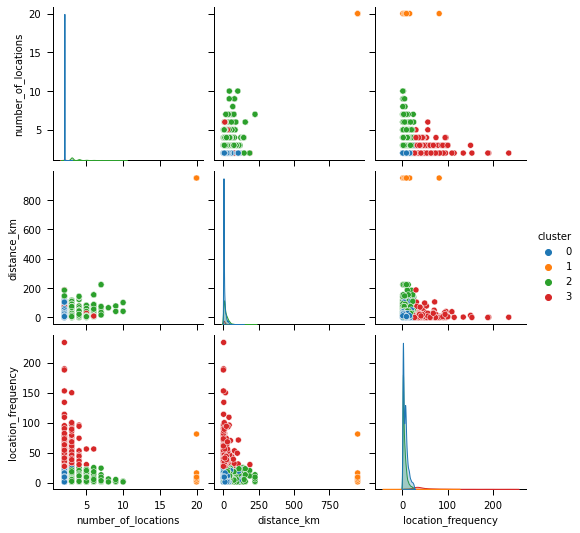

In [60]:
sns.pairplot(gye_gdf_clustering,hue="cluster", palette="tab10") # create a pairplot with the cluster labels

### Al menos un modelo supervisado (regresión o clasificación)  que realice la predicción de una salida que esté en su dataset.

In [61]:
gye_gdf.head()

stroke  stroke-width  stroke-opacity     fill  fill-opacity  \
0  #555555           2.0             1.0  #555555           0.5   
1  #555555           2.0             1.0  #555555           0.5   
2  #555555           2.0             1.0  #555555           0.5   
3  #555555           2.0             1.0  #555555           0.5   
4  #555555           2.0             1.0  #555555           0.5   

                     Name Description  \
0  Ciudadela 9 de Octubre        None   
1  Ciudadela 9 de Octubre        None   
2  Ciudadela 9 de Octubre        None   
3  Ciudadela 9 de Octubre        None   
4  Ciudadela 9 de Octubre        None   

                                            geometry    datetime      hora  \
0  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-12-11  21:19:47   
1  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-11-27  17:17:02   
2  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-10-19  15:29:15   
3  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-09-15  00:49:32   
4  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  2019-12-16  07:20:51   

   ...  ejecutivo   latitud   longitud  cliente_final  distance_km  \
0  ...      208.0 -2.231291 -79.890684     %.+.*!-*-!    21.391094   
1  ...      208.0 -2.231291 -79.890684     %.+!!&)(--    56.911374   
2  ...      208.0 -2.231291 -79.890684     %.+'%.+%(&     8.921539   
3  ...      208.0 -2.231291 -79.890684     %.*..(.'-.    63.440225   
4  ...      208.0 -2.231291 -79.890684     %.+&-'(&'&    17.139112   

   number_of_locations n_visits  home_lat   home_lng  location_frequency  
0                    4     1593 -2.210968 -79.925298                   1  
1                    6     1593 -2.125813 -79.922279                   1  
2                    2     1593 -2.210968 -79.925298                   1  
3                    7     1593 -2.249834 -79.890071                   1  
4                    7     1593 -2.202541 -79.926314                   1  

[5 rows x 23 columns]

In [62]:
gye_gdf.shape

(70410, 23)

In [63]:
gye_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 70410 entries, 0 to 70409
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   stroke               70388 non-null  object  
 1   stroke-width         70388 non-null  float64 
 2   stroke-opacity       70388 non-null  float64 
 3   fill                 70388 non-null  object  
 4   fill-opacity         70388 non-null  float64 
 5   Name                 70410 non-null  object  
 6   Description          80 non-null     object  
 7   geometry             70410 non-null  geometry
 8   datetime             70410 non-null  object  
 9   hora                 70410 non-null  object  
 10  comercio             70410 non-null  int64   
 11  proveedor            70410 non-null  float64 
 12  producto             70410 non-null  float64 
 13  ejecutivo            70410 non-null  float64 
 14  latitud              70410 non-null  float64 
 15  longitud   

In [64]:
gye_gdf_manipulation = gye_gdf[['datetime', 'hora','Name', 'comercio', 'proveedor','latitud', 'longitud','geometry', 'cliente_final', 'distance_km', 'number_of_locations', 'n_visits', 'location_frequency']]

In [65]:
gye_gdf_manipulation.head()

datetime      hora                    Name  comercio  proveedor  \
0  2019-12-11  21:19:47  Ciudadela 9 de Octubre     90706        5.0   
1  2019-11-27  17:17:02  Ciudadela 9 de Octubre     90706        5.0   
2  2019-10-19  15:29:15  Ciudadela 9 de Octubre     90706        6.0   
3  2019-09-15  00:49:32  Ciudadela 9 de Octubre     90706        5.0   
4  2019-12-16  07:20:51  Ciudadela 9 de Octubre     90706        6.0   

    latitud   longitud                                           geometry  \
0 -2.231291 -79.890684  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...   
1 -2.231291 -79.890684  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...   
2 -2.231291 -79.890684  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...   
3 -2.231291 -79.890684  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...   
4 -2.231291 -79.890684  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...   

  cliente_final  distance_km  number_of_locations  n_visits  \
0    %.+.*!-*-!    21.391094                    4      1593   
1    %.+!!&)(--    56.911374                    6      1593   
2    %.+'%.+%(&     8.921539                    2      1593   
3    %.*..(.'-.    63.440225                    7      1593   
4    %.+&-'(&'&    17.139112                    7      1593   

   location_frequency  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

In [66]:
gye_gdf_manipulation['comercio'].value_counts()

90567    7029
90569    4097
94082    3758
92631    3326
91783    2504
         ... 
95779       2
95805       2
90127       2
94479       2
95546       2
Name: comercio, Length: 272, dtype: int64

In [67]:
gye_gdf_manipulation.corr()

comercio  proveedor   latitud  longitud  distance_km  \
comercio             1.000000   0.013893 -0.219703  0.116640     0.017399   
proveedor            0.013893   1.000000  0.020112  0.019334     0.318512   
latitud             -0.219703   0.020112  1.000000 -0.572423    -0.028373   
longitud             0.116640   0.019334 -0.572423  1.000000     0.060062   
distance_km          0.017399   0.318512 -0.028373  0.060062     1.000000   
number_of_locations  0.047731   0.256882 -0.061221  0.058475     0.785092   
n_visits            -0.464006  -0.022783 -0.115333 -0.173077    -0.113099   
location_frequency  -0.196978   0.060457  0.025682 -0.011742     0.026298   

                     number_of_locations  n_visits  location_frequency  
comercio                        0.047731 -0.464006           -0.196978  
proveedor                       0.256882 -0.022783            0.060457  
latitud                        -0.061221 -0.115333            0.025682  
longitud                        0.058475 -0.173077           -0.011742  
distance_km                     0.785092 -0.113099            0.026298  
number_of_locations             1.000000 -0.041946           -0.014025  
n_visits                       -0.041946  1.000000            0.120575  
location_frequency             -0.014025  0.120575            1.000000

In [68]:
gye_gdf_manipulation.corr(method="spearman")

comercio  proveedor   latitud  longitud  distance_km  \
comercio             1.000000  -0.003727 -0.216183  0.216524     0.067981   
proveedor           -0.003727   1.000000  0.037505 -0.043225    -0.006031   
latitud             -0.216183   0.037505  1.000000 -0.644629    -0.082337   
longitud             0.216524  -0.043225 -0.644629  1.000000     0.208438   
distance_km          0.067981  -0.006031 -0.082337  0.208438     1.000000   
number_of_locations  0.049381  -0.020618 -0.068883  0.059453     0.452222   
n_visits            -0.491354   0.004797  0.032152 -0.303650    -0.334880   
location_frequency  -0.167398  -0.082016  0.002655 -0.030657    -0.005524   

                     number_of_locations  n_visits  location_frequency  
comercio                        0.049381 -0.491354           -0.167398  
proveedor                      -0.020618  0.004797           -0.082016  
latitud                        -0.068883  0.032152            0.002655  
longitud                        0.059453 -0.303650           -0.030657  
distance_km                     0.452222 -0.334880           -0.005524  
number_of_locations             1.000000  0.010524           -0.092192  
n_visits                        0.010524  1.000000            0.140905  
location_frequency             -0.092192  0.140905            1.000000

In [69]:
stats.pearsonr(df["location_frequency"],df["number_of_locations"])

(-0.014024666185693337, 0.00019800704964127012)

In [70]:
stats.spearmanr(df["location_frequency"],df["number_of_locations"])

SpearmanrResult(correlation=-0.09219239518781452, pvalue=1.0238811417812055e-132)

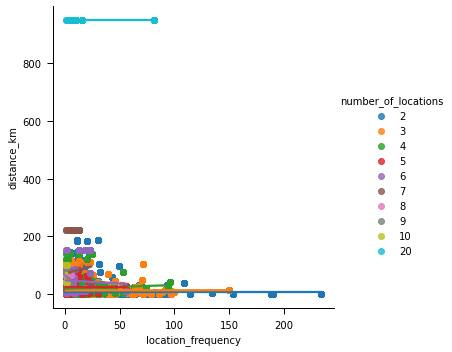

In [71]:
sns.lmplot(x="location_frequency", y="distance_km", hue="number_of_locations", data=gye_gdf_manipulation)

In [72]:
X=df.loc[:,["latitud","longitud","distance_km","n_visits","location_frequency"]]
y=df["number_of_locations"]

In [73]:
X

latitud   longitud  distance_km  n_visits  location_frequency
0     -2.115323 -79.910043     4.754176         2                   2
1     -2.115323 -79.910043     4.754176         2                   2
2     -2.124883 -79.927019     4.754176       407                   2
3     -2.124883 -79.927019     4.754176       407                   2
4     -2.119984 -79.904241     4.754176       313                  22
...         ...        ...          ...       ...                 ...
70405 -2.202591 -79.942561     4.115365        71                  13
70406 -2.202591 -79.942561     4.115365        71                  13
70407 -2.202591 -79.942561     4.115365        71                  13
70408 -2.202591 -79.942561     4.115365        71                  13
70409 -2.202591 -79.942561     4.115365        71                  13

[70410 rows x 5 columns]

In [74]:
y

0        3
1        3
2        3
3        3
4        3
        ..
70405    2
70406    2
70407    2
70408    2
70409    2
Name: number_of_locations, Length: 70410, dtype: int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [76]:
model = LinearRegression()

In [77]:
model.fit(X_train,y_train)

LinearRegression()

In [78]:
model.coef_

array([-5.49024468e-01,  2.05617817e-01,  1.84970077e-02,  2.80283734e-05,
       -1.61063381e-03])

In [79]:
model.intercept_

17.48865533594295

In [80]:
y_pred = model.predict(X_test)

In [81]:
y_pred

array([2.61586846, 2.23217599, 2.77205485, ..., 2.28377742, 2.42916897,
       2.37051381])

In [82]:
mean_absolute_error(y_pred,y_test)

0.5344191487721316

In [83]:
np.sqrt(mean_squared_error(y_pred,y_test))

0.7446285742734141

In [84]:
r2_score(y_test,y_pred)

0.6334527132288774

In [85]:
mean_squared_error(y_pred,y_test)

0.5544717136244575

In [86]:
X_distance_km=df.loc[:,["latitud","longitud","number_of_locations","n_visits","location_frequency"]]
y_distance_km=df["distance_km"]
X_distance_km
y_distance_km
X_distance_km_train, X_distance_km_test, y_distance_km_train, y_distance_km_test = train_test_split(X_distance_km, y_distance_km, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_distance_km_train,y_distance_km_train)

LinearRegression()

In [87]:
model.coef_

array([ 7.25487411e+00,  1.17077963e+01,  3.31374271e+01, -2.06583679e-03,
        8.56099005e-02])

In [88]:
model.intercept_

883.338411799775

In [89]:
y_distance_km_pred = model.predict(X_distance_km_test)
y_distance_km_pred

array([63.55352499, 29.44212735, -2.24232762, ..., -7.51045573,
        0.70502425, -3.76727221])

In [90]:
mean_absolute_error(y_distance_km_pred,y_distance_km_test)

17.68594457984657

In [91]:
np.sqrt(mean_squared_error(y_distance_km_pred,y_distance_km_test))


31.826227891587465

In [92]:
r2_score(y_distance_km_test,y_distance_km_pred)

0.6364979208647944

In [93]:
mean_squared_error(y_distance_km_pred,y_distance_km_test)

1012.90878180726

### Mobility Trajectories Analysis

In [94]:
gye_gdf_manipulation = gye_gdf[['datetime', 'hora','Name', 'comercio', 'latitud', 'longitud','geometry', 'cliente_final', 'distance_km', 'number_of_locations', 'n_visits']]

In [95]:
tdf_m = skmob.TrajDataFrame(gye_gdf_manipulation, latitude='latitud', longitude='longitud', datetime='fecha', user_id='cliente_final')
tdf_m.head()

datetime      hora                    Name  comercio       lat        lng  \
0 2019-12-11  21:19:47  Ciudadela 9 de Octubre     90706 -2.231291 -79.890684   
1 2019-11-27  17:17:02  Ciudadela 9 de Octubre     90706 -2.231291 -79.890684   
2 2019-10-19  15:29:15  Ciudadela 9 de Octubre     90706 -2.231291 -79.890684   
3 2019-09-15  00:49:32  Ciudadela 9 de Octubre     90706 -2.231291 -79.890684   
4 2019-12-16  07:20:51  Ciudadela 9 de Octubre     90706 -2.231291 -79.890684   

                                            geometry         uid  distance_km  \
0  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  %.+.*!-*-!    21.391094   
1  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  %.+!!&)(--    56.911374   
2  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  %.+'%.+%(&     8.921539   
3  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  %.*..(.'-.    63.440225   
4  POLYGON ((-79.89676 -2.23578, -79.89084 -2.235...  %.+&-'(&'&    17.139112   

   number_of_locations  n_visits  
0                    4      1593  
1                    6      1593  
2                    2      1593  
3                    7      1593  
4                    7      1593

In [108]:
tdf_m['Name'].value_counts()

Abel Gilbert                11666
Juan Montalvo                7877
Puerto Lisa                  5390
Flor de Bastion              4275
El Fortin                    3356
                            ...  
Sopeña                          6
Universidad de Guayaquil        4
Rosales                         2
Parroquia Sucre                 2
Colinas de la Florida           2
Name: Name, Length: 78, dtype: int64

In [113]:
m = tdf_m.plot_trajectory(zoom=12, weight=3, opacity=0.9, tiles='Stamen Toner', max_users=200)
m

mobility of users have more number of locations

In [97]:
gye_user_have_more_than_19_number_of_locations = gye_gdf_manipulation.loc[gye_gdf_manipulation['number_of_locations'] > 19]

In [98]:
gye_user_have_more_than_19_number_of_locations

datetime      hora        Name  comercio   latitud   longitud  \
1998   2019-06-17  10:37:25     Samanes     92593 -2.119984 -79.904241   
1999   2019-06-06  11:38:28     Samanes     92593 -2.119984 -79.904241   
2000   2019-06-06  17:33:40     Samanes     92593 -2.119984 -79.904241   
2001   2019-07-05  17:42:31     Samanes     92593 -2.119984 -79.904241   
2002   2019-07-19  17:20:12     Samanes     92593 -2.119984 -79.904241   
...           ...       ...         ...       ...       ...        ...   
70172  2019-08-14  11:08:08  Mapasingue     93662 -2.152097 -79.930936   
70173  2019-10-15  10:12:15  Mapasingue     93662 -2.152097 -79.930936   
70174  2019-10-08  13:01:41  Mapasingue     93662 -2.152097 -79.930936   
70175  2019-11-27  17:21:59  Mapasingue     93662 -2.152097 -79.930936   
70176  2019-12-06  10:24:53  Mapasingue     93662 -2.152097 -79.930936   

                                                geometry cliente_final  \
1998   POLYGON ((-79.91279 -2.11126, -79.91107 -2.115...           %%(   
1999   POLYGON ((-79.91279 -2.11126, -79.91107 -2.115...           %%(   
2000   POLYGON ((-79.91279 -2.11126, -79.91107 -2.115...           %%(   
2001   POLYGON ((-79.91279 -2.11126, -79.91107 -2.115...           %%(   
2002   POLYGON ((-79.91279 -2.11126, -79.91107 -2.115...           %%(   
...                                                  ...           ...   
70172  POLYGON ((-79.93706 -2.16274, -79.93148 -2.160...           %%(   
70173  POLYGON ((-79.93706 -2.16274, -79.93148 -2.160...           %%(   
70174  POLYGON ((-79.93706 -2.16274, -79.93148 -2.160...           %%(   
70175  POLYGON ((-79.93706 -2.16274, -79.93148 -2.160...           %%(   
70176  POLYGON ((-79.93706 -2.16274, -79.93148 -2.160...           %%(   

       distance_km  number_of_locations  n_visits  
1998    950.053643                   20       313  
1999    950.053643                   20       313  
2000    950.053643                   20       313  
2001    950.053643                   20       313  
2002    950.053643                   20       313  
...            ...                  ...       ...  
70172   950.053643                   20       182  
70173   950.053643                   20       182  
70174   950.053643                   20       182  
70175   950.053643                   20       182  
70176   950.053643                   20       182  

[183 rows x 11 columns]

In [99]:
tdf_m_2 = skmob.TrajDataFrame(gye_user_have_more_than_19_number_of_locations, latitude='latitud', longitude='longitud', datetime='fecha', user_id='cliente_final')
tdf_m_2.head()

datetime      hora     Name  comercio       lat        lng  \
1998 2019-06-17  10:37:25  Samanes     92593 -2.119984 -79.904241   
1999 2019-06-06  11:38:28  Samanes     92593 -2.119984 -79.904241   
2000 2019-06-06  17:33:40  Samanes     92593 -2.119984 -79.904241   
2001 2019-07-05  17:42:31  Samanes     92593 -2.119984 -79.904241   
2002 2019-07-19  17:20:12  Samanes     92593 -2.119984 -79.904241   

                                               geometry  uid  distance_km  \
1998  POLYGON ((-79.91279 -2.11126, -79.91107 -2.115...  %%(   950.053643   
1999  POLYGON ((-79.91279 -2.11126, -79.91107 -2.115...  %%(   950.053643   
2000  POLYGON ((-79.91279 -2.11126, -79.91107 -2.115...  %%(   950.053643   
2001  POLYGON ((-79.91279 -2.11126, -79.91107 -2.115...  %%(   950.053643   
2002  POLYGON ((-79.91279 -2.11126, -79.91107 -2.115...  %%(   950.053643   

      number_of_locations  n_visits  
1998                   20       313  
1999                   20       313  
2000                   20       313  
2001                   20       313  
2002                   20       313

In [111]:
tdf_m_2['Name'].value_counts().index

Index(['Febres Cordero', 'Guayacanes', 'Samanes', 'Sergio Toral', 'Mapasingue',
       'Guasmo Sur - La Union', 'Parroquia Garcia Moreno', 'Sauces',
       'Vergeles', 'Cristo del Consuelo', 'Guasmo Norte - Rio Guayas',
       'Puerto Lisa', 'Huancavilca Sur', 'Florida', 'Mucho Lote 2',
       'San Eduardo', 'Pradera'],
      dtype='object')

In [100]:
m_2 = tdf_m_2.plot_trajectory(zoom=12, weight=3, opacity=0.9, tiles='Stamen Toner', max_users=1,)
m_2

/home/kevinjlope/anaconda3/envs/IDS/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
